In [35]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [36]:
import zipfile
zip_ref = zipfile.ZipFile('./content/archive.zip', 'r')
zip_ref.extractall('./content')
zip_ref.close()

### Resize de imagenes
- También se eliminan los archivos corruptos
- Se cambia el formato a png 

In [37]:
import os
import cv2
IMG_SIZE = 100
scale_percent = 50

cat_path = './content/PetImages/Cat/'
catfiles = [f for f in os.listdir(cat_path) if f[-4:] == '.jpg']

for img in catfiles:
    img_path = cat_path + img
    img_arr = cv2.imread(img_path)
    if img_arr is None:
        os.remove(img_path)
        continue
    output = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    # width = int(img_arr.shape[1] * scale_percent / 100)
    # height = int(img_arr.shape[0] * scale_percent / 100)

    # dsize
    # dsize = (width, height)
    # output = cv2.resize(img_arr, dsize)
    out_path = cat_path + img[:-3] + 'png'
    os.remove(img_path)
    cv2.imwrite(out_path, output)

dog_path = './content/PetImages/Dog/'
catfiles = [f for f in os.listdir(dog_path) if f[-4:] == '.jpg']

for img in catfiles:
    img_path = dog_path + img
    img_arr = cv2.imread(img_path)
    if img_arr is None:
        os.remove(img_path)
        continue

    cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    out_path = dog_path + img[:-3] + 'png'
    cv2.imwrite(out_path, img_arr)
    os.remove(img_path)


### Train - Test Split

In [42]:

import random
import shutil

# make new folders for test and train
os.mkdir('./content/train')
os.mkdir('./content/train/Cat')
os.mkdir('./content/train/Dog')
os.mkdir('./content/test')
os.mkdir('./content/test/Cat')
os.mkdir('./content/test/Dog')

# ---- Cat Files ----
# get cat image filenames
catfiles = [f for f in os.listdir('./content/PetImages/Cat/') if f[-4:] == '.png']

limit = len(catfiles)
print('limit', limit)
train_indexes = []

# Get random 20%
for _ in range(int(limit * 0.2)):
    random_num = random.randint(0, limit - 1)
    while random_num in train_indexes:
        random_num = random.randint(0, limit - 1)
  
    print(random_num)
    train_indexes.append(random_num)

to_move = [catfiles[index] for index in train_indexes]

catfiles = [f for f in os.listdir('./content/PetImages/Cat/') if f[-4:] == '.png']

# Move test images
for img in catfiles:
    shutil.move(f'./content/PetImages/Cat/{img}', f'./content/test/Cat/{img}')

# Move train images
images = [f for f in os.listdir('./content/PetImages/Cat/') if f[-4:] == '.png']
for image in images:
    new_path = './content/train/Cat/' + image
    shutil.move('./content/PetImages/Cat/' + image, new_path)

# ---- Dog Files ----
# get cat image filenames
dogfiles = [f for f in os.listdir('./content/PetImages/Dog/') if f[-4:] == '.png']

limit = len(dogfiles)
train_indexes = []

# Get random 20%
for _ in range(int(limit * 0.2)):
    random_num = random.randint(0, limit - 1)
    while random_num in train_indexes:
        random_num = random.randint(0, limit - 1)
  
    train_indexes.append(random_num)

to_move = [dogfiles[index] for index in train_indexes]

# Move test images
for img in to_move:
    shutil.move(f'./content/PetImages/Dog/{img}', f'./content/test/Dog/{img}')

# Move train images
images = [f for f in os.listdir('./content/PetImages/Dog/') if f[-4:] == '.png']

for image in images:
    new_path = './content/train/Dog/' + image
    shutil.move('./content/PetImages/Dog/' + image, new_path)


"\n# ---- Dog Files ----\n# get cat image filenames\ndogfiles = [f for f in os.listdir('./content/PetImages/Dog/') if f[-4:] == '.png']\n\nlimit = len(dogfiles)\ntrain_indexes = []\n\n# Get random 20%\nfor _ in range(int(limit * 0.2)):\n    random_num = random.randint(0, limit - 1)\n    while random_num in train_indexes:\n        random_num = random.randint(0, limit - 1)\n  \n    train_indexes.append(random_num)\n\nto_move = [dogfiles[index] for index in train_indexes]\n\n# Move test images\nfor img in to_move:\n    shutil.move(f'./content/PetImages/Dog/{img}', f'./content/test/Dog/{img}')\n\n# Move train images\nimages = [f for f in os.listdir('./content/PetImages/Dog/') if f[-4:] == '.png']\n\nfor image in images:\n    new_path = './content/train/Dog/' + image\n    shutil.move('./content/PetImages/Dog/' + image, new_path)\n"

# Nueva sección

In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [44]:
IMG_SIZE = 100

# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = './content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(IMG_SIZE,IMG_SIZE)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = './content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(IMG_SIZE,IMG_SIZE)
)

Found 9976 files belonging to 2 classes.
Found 14970 files belonging to 2 classes.


In [45]:
# Normalize
def process(image,label):
    image = tf.cast(image/IMG_SIZE, tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [46]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 98, 98, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 47, 47, 64)       256       
 hNormalization)                                                 
                                                      

In [48]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(train_ds,epochs=2,validation_data=validation_ds)

312/312 [==============================] - 401s 1s/step - loss: 0.0055 - accuracy: 0.9970 - val_loss: 46.9016 - val_accuracy: 0.1674


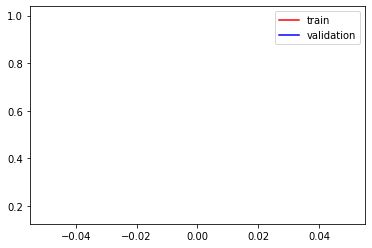

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

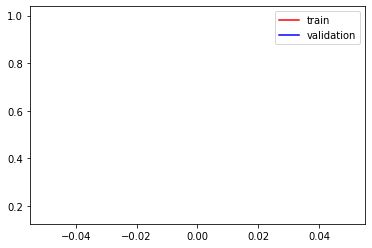

In [51]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

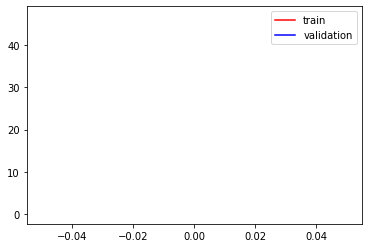

In [52]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

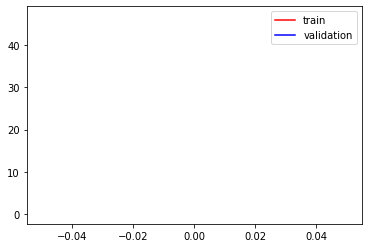

In [53]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [54]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)